# Analysis of Seattle PD bicycle-related Field Contacts

##### Ethan C. Campbell, for Central Seattle Greenways / Helmet Law Working Group

For questions, contact me at ethanchenbell@gmail.com.

#### Import packages and set file system

In [1]:
%matplotlib inline
from numpy import *
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',50)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300     # turn on for higher-quality figure export
from datetime import datetime, timedelta
import platform
import warnings
import sys

from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# choose root directory for data files
if platform.system() == 'Darwin':
    data_dir = '/Users/Ethan/Documents/Finances and records/2020-06-30 - Helmet Law Working Group/Data/'
    results_dir = '/Users/Ethan/Documents/Finances and records/2020-06-30 - Helmet Law Working Group/Figures/'
elif platform.system() == 'Linux':
    data_dir = '/dat1/ethancc/CSG/'
    results_dir = data_dir
    
# set directory paths
current_results_dir = results_dir + '2021-12-03 - Seattle PD Field Contact analyses/'

#### Load compiled bike citation records

Note: file created previously in Jupyter notebook [***csg_compile_king_county_bike_citations.ipynb***](https://github.com/ethan-campbell/Miscellaneous/blob/master/csg_compile_king_county_bike_citations.ipynb), which is available on my GitHub.

In [12]:
kc_citations = pd.read_excel(data_dir + '2021-10-18 - compiled King County bike citation records.xlsx').drop(columns=['Unnamed: 0'])
spd_citations = kc_citations[kc_citations['Law Enforcement Agency'] == 'Seattle Police Department']
spd_citations.head(3)

,Court Name,Case Number,Case Key (KCDC) or Token (MCs),Case Type,Case File Date,Law Enforcement Agency,Violation Date,Law Code,Law Description,Disposition,Disposition Date,Defendant Gender,Defendant Race,Defendant Ethnicity,Officer Badge Number,AR Ordered Amount,AR Adjustment Amount,AR Paid Amount,AR Due Amount,Originating Query,City,Violation Datetime,Officer First Name,Officer Middle Name,Officer Last Name,AR Adjusted Amount
1658,King County District Court,8Z0505330,37573291,Infraction,2018-08-27,Seattle Police Department,2018-08-25,RCW 46.61.755,Violating Laws While Riding Bicycle,Committed,2018-10-15,Male,White,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN
1756,King County District Court,I10974250,38502744,Infraction,2007-08-20,Seattle Police Department,2007-08-17,King County Health Code 9.10.010A or 9.15.010,Bicycle Helmet Required,Committed,2009-11-03,Male,Black,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN
1757,King County District Court,I11111192,38621778,Infraction,2008-09-29,Seattle Police Department,2008-09-19,King County Health Code 9.10.010A or 9.15.010,Bicycle Helmet Required,Committed,2009-10-30,Male,White,Unknown,NaN,NaN,NaN,NaN,NaN,All bike violations (requested KCHC 9.10.010 a...,Seattle,NaT,NaN,NaN,NaN,NaN


#### Load compiled King County jurisdiction citation statistics

Note: file created previously in Jupyter notebook [***csg_analyze_king_county_bike_citations.ipynb***](https://github.com/ethan-campbell/Miscellaneous/blob/master/csg_analyze_king_county_bike_citations.ipynb), which is available on my GitHub.

In [17]:
# load compiled statistics by city
cities = pd.read_excel(data_dir + '2021-10-18 - King County helmet citation statistics.xlsx',index_col='Jurisdiction')
cities.loc['Seattle']

Population (OFM, April 2021)                                                                                       769500
Years with citation records                                             2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010...
Total helmet citations in records                                                                                    1694
Recent helmet citations (2015-2019 only)                                                                              215
Average annual citations (over all years that citations were issued)                                                 94.1
Average annual citations (2015-2019 only)                                                                              43
Annual citation rate per 100k people (all years)                                                                     12.2
Annual citation rate per 100k people (2015-2019 only)                                                                 5.6
King County helmet law c

#### Load summaries of Seattle PD bicycle-related Field Contact narrative reports

Note: records span May 7, 2019 to March 26, 2021; some narrative reports were redacted prior to release to public.

In [21]:
# load SPD Field Contact report summaries
spd_fc_summaries = pd.read_excel(data_dir + '2021-12-03 - Seattle PD Field Contact Report summaries - Installments 2-3.xlsx',index_col='Report Number')
spd_fc_summaries.head(3)

,Additional Information Origin,FCC Type (redundant),Homelessness,Officer on Bike Patrol,Type of Bike Violation,Riding Location,Subject Asked to Produce Identification,Subject Produced Identification,Subject Identified Verbally,Warrant Check,Warrant Check Result,Outcome,Reason for Suspicion/Other Circumstances,Other notes
Report Number,,,,,,,,,,,,,,
2019-163273,FCs (Installment 2),Bike/infraction warning-no cite,Yes,Yes,Helmet violation,Street (presumed),Yes,NaN,NaN,Yes,Clear,Verbal warning,NaN,NaN
2019-163288,FCs (Installment 2),Bike/infraction warning-no cite,Yes,Yes,Helmet violation,Street (presumed),NaN,NaN,Yes,Yes,Clear,Verbal warning,NaN,NaN
2019-163496,FCs (Installment 2),Bike/infraction warning-no cite,Yes,Yes,Helmet violation,Street (presumed),NaN,Yes,NaN,Yes,Clear,Verbal warning,NaN,NaN


#### Load Seattle PD bicycle-related Field Contact fields from Records Management System (RMS) data

Note: records span May 7, 2019 to March 26, 2021, after Seattle PD began using Mark43 exclusively as their RMS.

In [387]:
# load SPD Field Contact report entries
spd_fc_data = pd.read_excel(data_dir + '2021-06-16 - Seattle PD Records Management System (RMS) Field Contacts (2019-05-07 to 2021-03-26) - all bike-related.xlsx',
                            index_col='Report Number')

# redact identifying information; display
spd_fc_data.drop(columns=['FCC Subject 1','FCC Subject 1 DOB','FCC Subject 1 Home Address Street Address',
                          'FCC Subject 1 Home Address Lat ','FCC Subject 1 Home Address Long','License Plate / Registration #','VIN #'],
                 inplace=True)
display(spd_fc_data.head(3))

# merge subject types into narrative summary entries
subject_types = spd_fc_data.loc[spd_fc_summaries.index]['FCC Subject 1 Involvement Type']
subject_types = subject_types[~subject_types.index.duplicated()]
spd_fc_summaries['Subject Types'] = subject_types

# merge dates into narrative summary entries
fc_dates = spd_fc_data.loc[spd_fc_summaries.index]['Date']
fc_dates = fc_dates[~fc_dates.index.duplicated()]
spd_fc_summaries['Date'] = fc_dates

,Keyword,Report ID,Primary Agency,Report Type,Report Subtype,Report Writer,Participating Officer,All Assisting Officers and Assist Types,Report Date / Time,Event Statistics,Event Location Location Alias,Event Location Street Address,Event Location Cross Street 1,Event Location Cross Street 2,Event Location City,Event Location State,Event Location Location Category,Event Location Lat,Event Location Long,Event Location Neighborhood,Date,Time,Hour Group,Month,Day of Week,Event District,Event Sector,Event Grid,Event Neighborhood,FCC Type,FCC Disposition,FCC Subject 1 Involvement Type,FCC Subject 1 Home Address Location Alias,FCC Subject 1 Home Address Cross Street 1,FCC Subject 1 Home Address Cross Street 2,FCC Subject 1 Home Address City,FCC Subject 1 Home Address State,FCC Subject 1 Home Address Location Category,FCC Subject 1 Home Address Neighborhood,FCC Subject 1 Sex,FCC Subject 1 Race,FCC Subject 1 Ethnicity,Year of Manufacture,Make,Model,Registration State,Vehicle Color,Vehicle Property Status,Vehicle Property Status Date
Report Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-163273,Bicycle,8198880844,Seattle Police Department,Field Contact,JOSHUA WILLIAM GRAHAM,EDUARDO FRANCISCO LOPEZ #8343,BERNARD THOMAS MAHONEY #6296,BERNARD THOMAS MAHONEY #6296 (Backing Officer)...,2019-05-07 16:59:00,"Body Worn Video, Homelessness",NaN,NaN,NW LEARY WY,15 AV NW,SEATTLE,WA,NaN,47.663660,-122.376134,WEST WOODLAND,2019-05-07,11:47:00,1100,May,Tue,N,B,B1,WEST WOODLAND,Bike/infraction warning-no cite,"Identify/release, Oral/Verbal Warning, Stop Ex...",suspect,NaN,NaN,NaN,SEATTLE,WA,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2019-163288,Bicycle,8198893317,Seattle Police Department,Field Contact,RONALD GENE LABRANCHE,EDUARDO FRANCISCO LOPEZ #8343,BERNARD THOMAS MAHONEY #6296,BERNARD THOMAS MAHONEY #6296 (Backing Officer)...,2019-05-07 17:17:00,"Body Worn Video, Homelessness",NaN,NaN,NW BALLARD WY,11 AV NW,SEATTLE,WA,NaN,47.662927,-122.370779,WEST WOODLAND,2019-05-07,11:53:00,1100,May,Tue,N,B,B2,WEST WOODLAND,Bike/infraction warning-no cite,"Identify/release, Oral/Verbal Warning, Stop Ex...",suspect,NaN,NaN,NaN,SEATTLE,WA,NaN,NaN,Male,White,Not Hispanic Or Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2019-163496,Bicycle,8198924485,Seattle Police Department,Field Contact,DANIEL JAY HENRY,EDUARDO FRANCISCO LOPEZ #8343,BERNARD THOMAS MAHONEY #6296,BERNARD THOMAS MAHONEY #6296 (Backing Officer)...,2019-05-07 17:32:00,"Body Worn Video, Homelessness",NaN,NaN,NW 46 ST,9 AV NW,SEATTLE,WA,NaN,47.662193,-122.368626,WEST WOODLAND,2019-05-07,14:26:00,1400,May,Tue,N,B,B2,WEST WOODLAND,Bike/infraction warning-no cite,"Identify/release, Oral/Verbal Warning, Stop Ex...",suspect,NaN,NaN,NaN,SEATTLE,WA,NaN,NaN,Male,Black or African American,Not Hispanic Or Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaT


#### Field Contact narrative reports: summary statistics

In [370]:
print('\nNumber of reports reviewed:',len(spd_fc_summaries))

print('\nBreakdown of types of Field Contacts:')
display(spd_fc_summaries['FCC Type (redundant)'].value_counts())

print('\nBreakdown of types of Field Contacts (%):')
display(100 * spd_fc_summaries['FCC Type (redundant)'].value_counts() / len(spd_fc_summaries))

print('\nFraction of Field Contacts involving a homeless subject, either noted by officer or inferred from clear narrative elements: {0:.1f}%'\
      .format(100 * sum(spd_fc_summaries['Homelessness'].str.contains('Yes')) / len(spd_fc_summaries)))

print('\nFraction of Field Contacts in which officer(s) were on mounted bike patrol: {0:.1f}%'\
      .format(100 * sum(spd_fc_summaries['Officer on Bike Patrol'].str.contains('Yes')) / len(spd_fc_summaries)))

print('\nFraction of Field Contacts originating from a bike helmet violation: {0:.1f}%'\
      .format(100 * sum(spd_fc_summaries['Type of Bike Violation'].str.contains('Helmet violation')) / len(spd_fc_summaries)))

print('\nFraction of Field Contacts in which a warrant check was conducted: {0:.1f}%'\
      .format(100 * sum(spd_fc_summaries['Warrant Check'].str.contains('Yes')) / len(spd_fc_summaries)))

print('\nResults of warrant checks (yes indicates an open warrant was identified):')
display(spd_fc_summaries['Warrant Check Result'].value_counts())

print('\nResults of warrant checks (yes indicates an open warrant was identified) (%):')
display(100 * spd_fc_summaries['Warrant Check Result'].value_counts() / sum(spd_fc_summaries['Warrant Check'].str.contains('Yes')))

print('\nOutcomes of Field Contacts:')
display(spd_fc_summaries['Outcome'].value_counts())

print('\nOutcomes of Field Contacts (%):')
display(100 * spd_fc_summaries['Outcome'].value_counts() / len(spd_fc_summaries))

print('\nSuspicion articulated for Terry Stops:')
print(spd_fc_summaries[spd_fc_summaries['FCC Type (redundant)'] == 'Terry Stop']['Reason for Suspicion/Other Circumstances'].values)

print('\nFraction of Terry Stops in which a bike violation (e.g., helmet violation) was the sole rationale originally articulated for the stop; \n' + \
      'i.e., cases in which suspicion developed after the stop was initiated: {0:.0f}% ({1} of {2})'
      .format(100 * 2 / spd_fc_summaries['FCC Type (redundant)'].value_counts()['Terry Stop'],
              2,spd_fc_summaries['FCC Type (redundant)'].value_counts()['Terry Stop']))

print('\nNOTE: no suspicion was articulated in narrative reports for the remainder of Field Contacts that were not Terry Stops')


Number of reports reviewed: 40

Breakdown of types of Field Contacts:


Bike/infraction warning-no cite         30
Terry Stop                               7
Pedestrian violation/warning-no cite     1
Other infraction                         1
Trespass Warning (to suspect)            1
Name: FCC Type (redundant), dtype: int64


Breakdown of types of Field Contacts (%):


Bike/infraction warning-no cite         75.0
Terry Stop                              17.5
Pedestrian violation/warning-no cite     2.5
Other infraction                         2.5
Trespass Warning (to suspect)            2.5
Name: FCC Type (redundant), dtype: float64


Fraction of Field Contacts involving a homeless subject, either noted by officer or inferred from clear narrative elements: 47.5%

Fraction of Field Contacts in which officer(s) were on mounted bike patrol: 57.5%

Fraction of Field Contacts originating from a bike helmet violation: 85.0%

Fraction of Field Contacts in which a warrant check was conducted: 55.0%

Fraction of Field Contacts in which a warrant check was conducted (suspicion-related stops only): 37.5%

Results of warrant checks (yes indicates an open warrant was identified):


Clear                                      11
Yes, non-extraditable / no action taken     6
Clear (presumed)                            4
Yes                                         1
Name: Warrant Check Result, dtype: int64


Results of warrant checks (yes indicates an open warrant was identified) (%):


Clear                                      50.000000
Yes, non-extraditable / no action taken    27.272727
Clear (presumed)                           18.181818
Yes                                         4.545455
Name: Warrant Check Result, dtype: float64


Outcomes of Field Contacts:


Verbal warning                             32
Subject released                            6
Referred for charging/prosecution           1
Arrest / later released (wrong suspect)     1
Name: Outcome, dtype: int64


Outcomes of Field Contacts (%):


Verbal warning                             80.0
Subject released                           15.0
Referred for charging/prosecution           2.5
Arrest / later released (wrong suspect)     2.5
Name: Outcome, dtype: float64


Suspicion articulated for Terry Stops:
['Theft in progress suspected (appeared to be tampering with Lime Bike)'
 'Stolen bike suspected (riding Lime Bike with a trailer attached)' nan
 'Theft suspected (attempting to remove bike from rack while riding another bike)'
 'Theft in progress suspected (attempted to steal marked police bike)'
 'Subject was loading a second bike onto the Lime Bike he was riding, but gave plausible explanation, showing that brake lines of second bike were broken'
 'Subject riding a Lime Bike with a broken rear light and rear wheel lock']

Fraction of Terry Stops in which a bike violation (e.g., helmet violation) was the sole rationale originally articulated for the stop; 
i.e., cases in which suspicion developed after the stop was initiated: 29% (2 of 7)

NOTE: no suspicion was articulated in narrative reports for the remainder of Field Contacts that were not Terry Stops


In [382]:
# subset Field Contacts into (1) Terry Stops, and (2) 'Bike/infraction warning-no cite'
spd_fc_terry_stops = spd_fc_data[spd_fc_data['FCC Type'] == 'Terry Stop']
spd_fc_bike_warning = spd_fc_data[spd_fc_data['FCC Type'] == 'Bike/infraction warning-no cite']
spd_fc_combined = spd_fc_data[logical_or(spd_fc_data['FCC Type'] == 'Terry Stop',
                                         spd_fc_data['FCC Type'] == 'Bike/infraction warning-no cite')]

# summarize
data_avail_in_months = (datetime(2021,3,26)-datetime(2019,5,7)) / timedelta(days=30.5)
print('\nTime period of Field Contact data availability: {0:.1f} months, from {1} to {2}'\
      .format(data_avail_in_months, datetime(2019,5,7).date(), datetime(2021,3,26).date()))

print('\nSearch keywords used for public records request (plus "Biker" and "Bicycler", which returned no Field Contacts during this period):')
display(spd_fc_data['Keyword'].value_counts())

print('\nFrom here on, we are specifically analyzing two largest types of Field Contacts for which subjects were reliably bicyclists\n  in the narrative reports reviewed: \n' + \
      '{0} Terry Stops and {1} "Bike/infraction warning-no cite" entries (ignoring less common categories - \n'\
      .format(*spd_fc_data['FCC Type'].value_counts()[['Terry Stop','Bike/infraction warning-no cite']].values) + \
      '  campsite clearances, other infractions, tresspass warnings, park violations, pedestrian violations/warnings, citizen tips, etc.)')

susp_frac = spd_fc_bike_warning['FCC Subject 1 Involvement Type'].value_counts()[['suspect','Suspicious']].sum() \
            / len(spd_fc_bike_warning)
print('\nFraction of bike infraction warning entries involving suspicion of subject unrelated to infraction (i.e., pretextual stops):\n  {0:.1f}%'
      .format(100 * susp_frac))

print('\nAnnual rate of police contacts based on these records:\n' + \
      '- Terry Stops only: {0:.0f} per year (some may not be stops of bicyclists, but most likely are)\n'
      .format(12 * len(spd_fc_terry_stops) / data_avail_in_months) + \
      '- Bike infraction warnings only: {0:.0f} per year\n'
      .format(12 * len(spd_fc_bike_warning) / data_avail_in_months) + \
      '- Both combined: {0:.0f} per year\n'
      .format(12 * len(spd_fc_combined) / data_avail_in_months) + \
      '- ** Estimated Terry Stops that develop solely from a bike infraction, based on 2-in-7 statistic from above: {0:.0f} per year\n'
      .format((2/7) * 12 * len(spd_fc_terry_stops) / data_avail_in_months) + \
      '- ** Bike infraction warnings involving suspicion (pretextual stops): {0:.0f} per year\n'
      .format(susp_frac * 12 * len(spd_fc_bike_warning) / data_avail_in_months) + \
      '\n      ** = suspicion-related stops enabled by existing bicycle infractions')

annual_citation_rate = len(spd_citations[logical_and(spd_citations['Violation Date'].dt.year >= 2015,
                                                     spd_citations['Violation Date'].dt.year <= 2019)]) / 5
print('\nCompare sum of two final annual rates to annual rate of bike-related citations (to bicyclists) based on Seattle Municipal Court records:\n' + \
      '- {0:.0f} per year'.format(annual_citation_rate))

print('\nFrequency of arrests resulting from Terry stops of bicyclists: {0:.1f}%'\
      .format(100 * sum(spd_fc_terry_stops['FCC Disposition'].str.contains('Arrest',case=False)) \
              / len(spd_fc_terry_stops)))
      

print('\n\n-- DEMOGRAPHICS --')

print('\n\nFraction of Field Contacts involving a homeless subject, as noted by officer in a check box RMS field:\n' + \
      '- Terry Stops only: {0:.1f}%\n- Bike infraction warnings only: {1:.1f}%\n- Both combined: {2:.1f}%\n'
      .format(100 * sum(spd_fc_terry_stops['Event Statistics'].str.contains('Homelessness')) / len(spd_fc_terry_stops),
              100 * sum(spd_fc_bike_warning['Event Statistics'].str.contains('Homelessness')) / len(spd_fc_bike_warning),
              100 * sum(spd_fc_combined['Event Statistics'].str.contains('Homelessness')) / len(spd_fc_combined)) + \
      '\n      NOTE: the details in the narrative reports reviewed above indicate these percentages are likely an undercount')

susp_mask = logical_or(spd_fc_bike_warning['FCC Subject 1 Involvement Type'] == 'suspect',
                       spd_fc_bike_warning['FCC Subject 1 Involvement Type'] == 'Suspicious')
spd_fc_bike_warning_susp = spd_fc_bike_warning[susp_mask]
spd_fc_bike_warning_non_susp = spd_fc_bike_warning[~susp_mask]

def ethnicity_disp(input_data):
    ethnicity_counts = input_data[input_data['FCC Subject 1 Race'] == 'White']['FCC Subject 1 Ethnicity'].value_counts().drop('Unknown')
    print()
    eth_summary = 100 * ethnicity_counts / ethnicity_counts.sum()
    display(eth_summary)
    return eth_summary

print('\n\nAll recorded bike infraction stops resulting in warnings (n = {0}):'\
      .format(spd_fc_bike_warning['FCC Subject 1 Race'].value_counts().sum()))
demos_spd_fc_bike_warning = 100 * spd_fc_bike_warning['FCC Subject 1 Race'].value_counts(normalize=True)
display(demos_spd_fc_bike_warning)
eth_spd_fc_bike_warning = ethnicity_disp(spd_fc_bike_warning)

print('\n\nPretextual stops (bike infraction stops resulting in warnings in which suspicion was a factor in the stop) (n = {0}):'\
      .format(spd_fc_bike_warning_susp['FCC Subject 1 Race'].value_counts().sum()))
demos_spd_fc_bike_warning_susp = 100 * spd_fc_bike_warning_susp['FCC Subject 1 Race'].value_counts(normalize=True)
display(demos_spd_fc_bike_warning_susp)
eth_spd_fc_bike_warning_susp = ethnicity_disp(spd_fc_bike_warning_susp)

print('\n\nTerry stops of bicyclists (n = {0}):'\
      .format(spd_fc_terry_stops['FCC Subject 1 Race'].value_counts().sum()))
demos_spd_fc_terry_stops = 100 * spd_fc_terry_stops['FCC Subject 1 Race'].value_counts(normalize=True)
display(demos_spd_fc_terry_stops)
eth_spd_fc_terry_stops = ethnicity_disp(spd_fc_terry_stops)


Time period of Field Contact data availability: 22.6 months, from 2019-05-07 to 2021-03-26

Search keywords used for public records request (plus "Biker" and "Bicycler", which returned no Field Contacts during this period):


Bicycle      908
Bike         591
Bicyclist     24
Cyclist        4
Name: Keyword, dtype: int64


From here on, we are specifically analyzing two largest types of Field Contacts for which subjects were reliably bicyclists
  in the narrative reports reviewed: 
944 Terry Stops and 201 "Bike/infraction warning-no cite" entries (ignoring less common categories - 
  campsite clearances, other infractions, tresspass warnings, park violations, pedestrian violations/warnings, citizen tips, etc.)

Fraction of bike infraction warning entries involving suspicion of subject unrelated to infraction (i.e., pretextual stops):
  57.7%

Annual rate of police contacts based on these records:
- Terry Stops only: 501 per year (some may not be stops of bicyclists, but most likely are)
- Bike infraction warnings only: 107 per year
- Both combined: 608 per year
- ** Estimated Terry Stops that develop solely from a bike infraction, based on 2-in-7 statistic from above: 143 per year
- ** Bike infraction warnings involving suspicion (pretextual stops): 62 per year

      ** = suspicion-related stops enable

White                        76.8
Black or African American    20.0
Unknown                       2.4
Asian                         0.8
Name: FCC Subject 1 Race, dtype: float64

Not Hispanic Or Latino    79.166667
Hispanic Or Latino        20.833333
Name: FCC Subject 1 Ethnicity, dtype: float64



Pretextual stops (bike infraction stops resulting in warnings in which suspicion was a factor in the stop) (n = 78):


White                        76.923077
Black or African American    21.794872
Unknown                       1.282051
Name: FCC Subject 1 Race, dtype: float64

Not Hispanic Or Latino    81.25
Hispanic Or Latino        18.75
Name: FCC Subject 1 Ethnicity, dtype: float64



Terry stops of bicyclists (n = 834):


White                                        58.033573
Black or African American                    30.575540
Unknown                                       5.635492
American Indian or Alaska Native              3.117506
Asian                                         2.398082
Native Hawaiian or Other Pacific Islander     0.239808
Name: FCC Subject 1 Race, dtype: float64

Not Hispanic Or Latino    74.166667
Hispanic Or Latino        25.833333
Name: FCC Subject 1 Ethnicity, dtype: float64

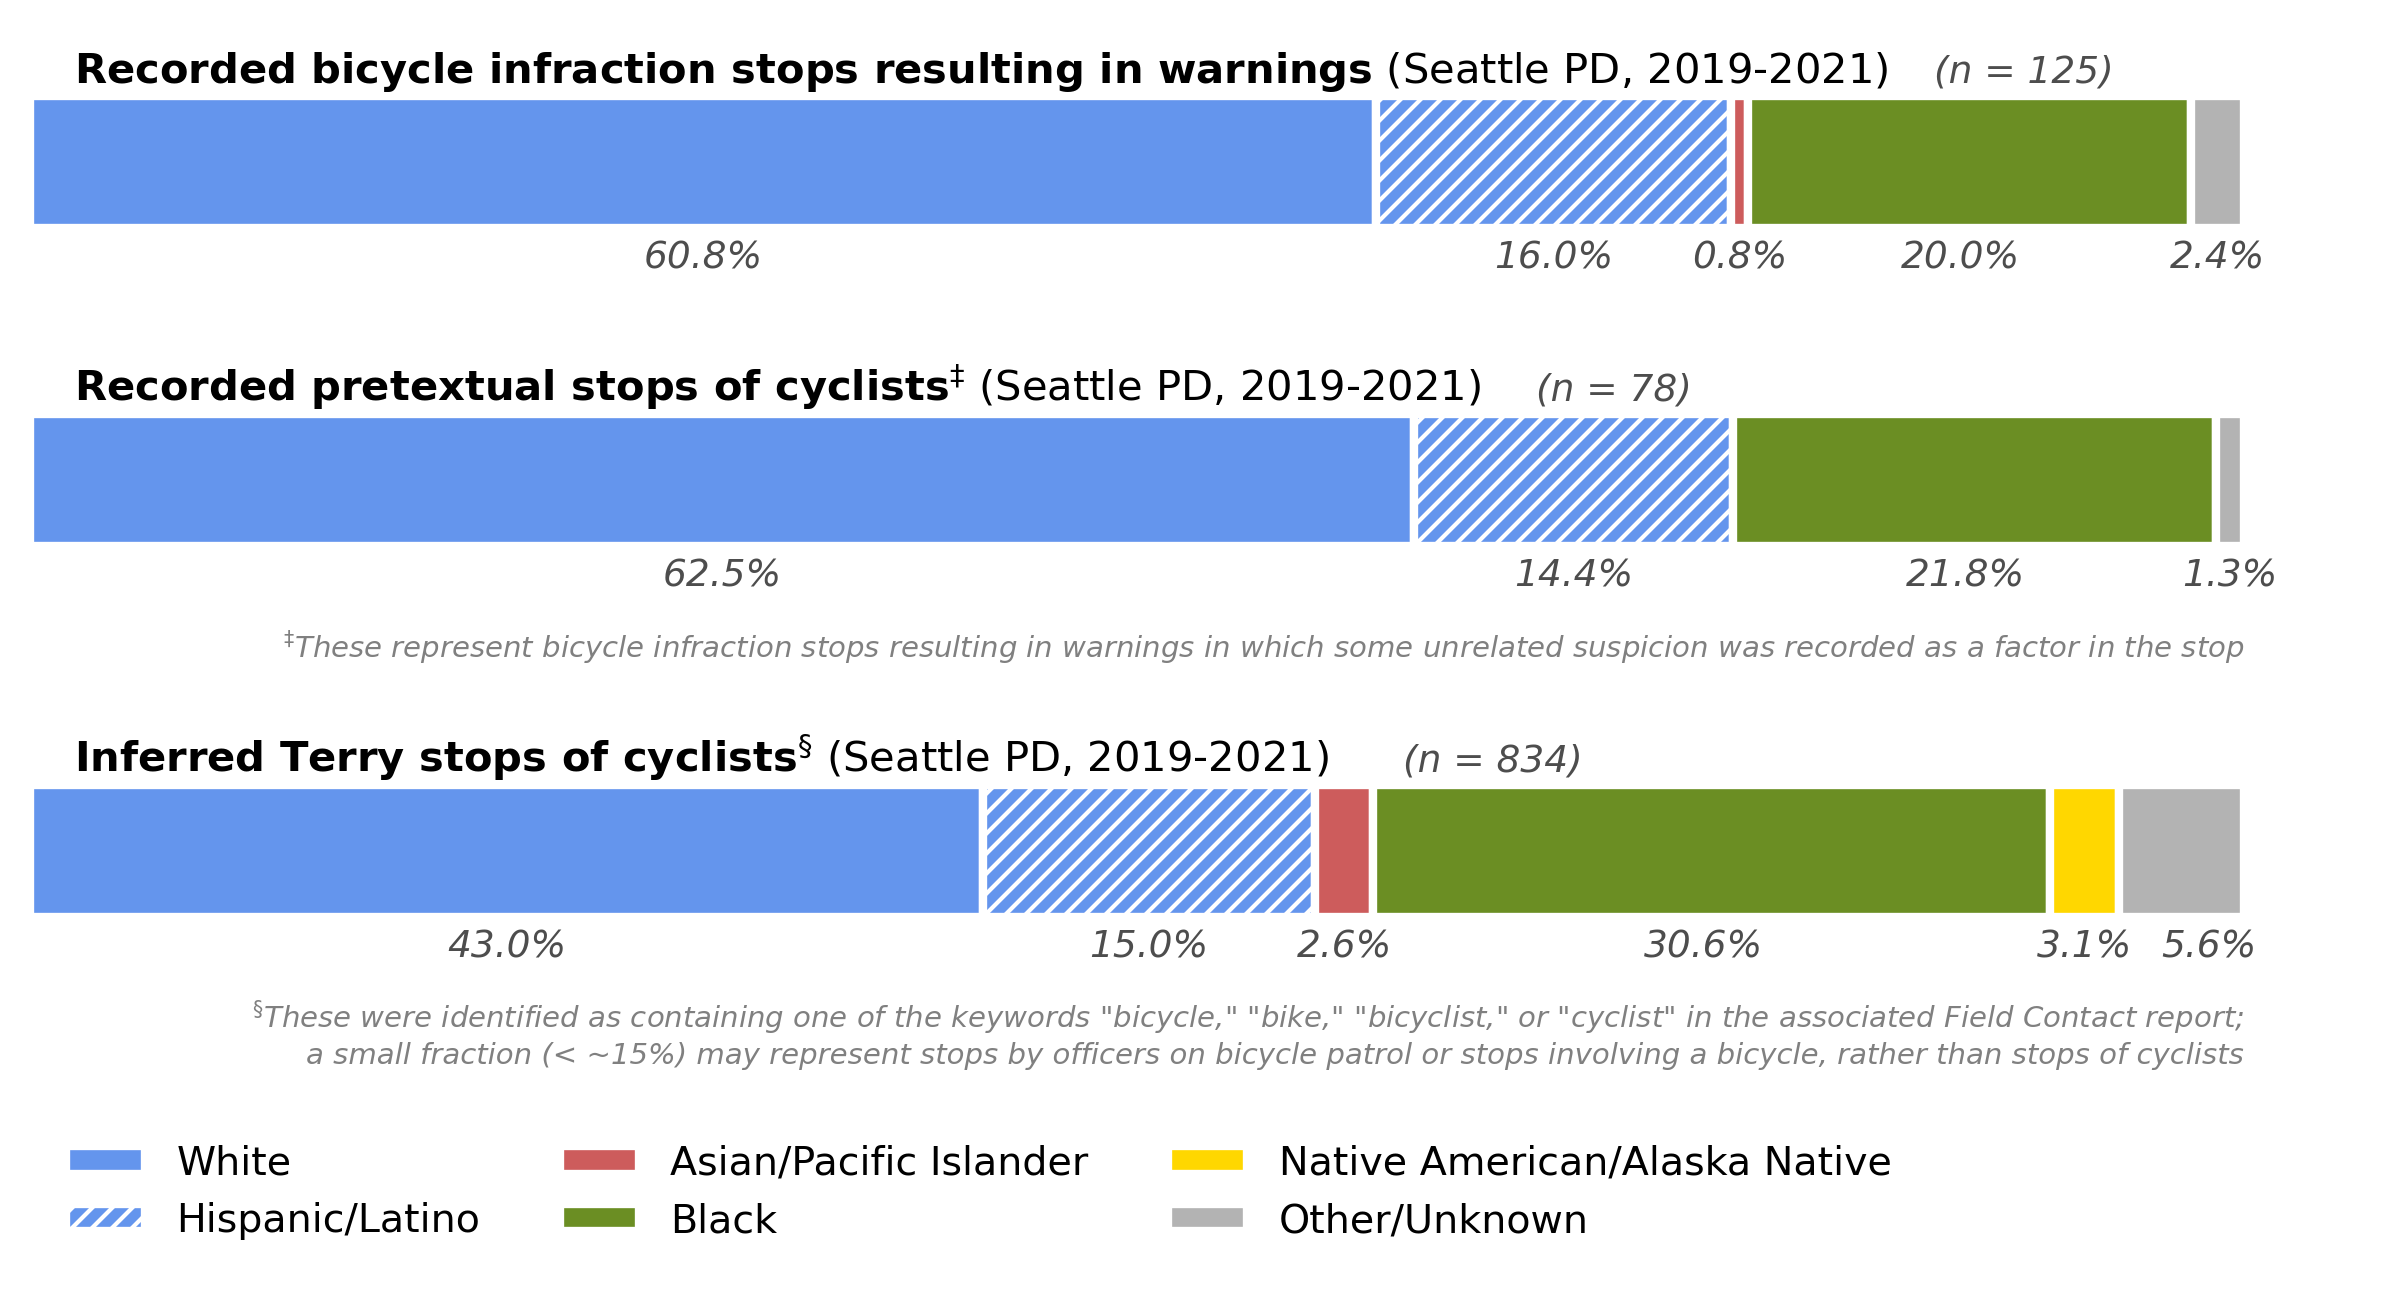

In [242]:
plt.figure(figsize=(10,5.5),facecolor='w')

labels = ['White','Hispanic/Latino','Asian/Pacific Islander','Black','Other/Unknown']
colors = ['cornflowerblue','cornflowerblue','indianred','olivedrab','0.7']
bump_label = [0,0,0,-0.4,0]
bump_label_v = [0,0,0,0,0]
label_star = [0,0,0,0,0]
y_baseline = 4.2
widths = array([demos_spd_fc_bike_warning['White'] * eth_spd_fc_bike_warning['Not Hispanic Or Latino']/100,
                demos_spd_fc_bike_warning['White'] * eth_spd_fc_bike_warning['Hispanic Or Latino']/100,
                demos_spd_fc_bike_warning['Asian'],
                demos_spd_fc_bike_warning['Black or African American'],
                demos_spd_fc_bike_warning['Unknown']])
h1 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
h1[1].set_hatch('/////')   # for Hispanic/Latino category
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline - 0.4 + bump_label_v[w_idx],
             '{0:.1f}%{1}'.format(w,'$^*$'*label_star[w_idx]),
             horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Recorded~bicycle~infraction~stops~resulting~in~warnings}$ (Seattle PD, 2019-2021)')
plt.text(86,y_baseline+0.34,'(n = {0})'.format(spd_fc_bike_warning['FCC Subject 1 Race'].value_counts().sum()),
         style='italic',color='0.3',verticalalignment='center',fontsize=9)

labels = ['White','Hispanic/Latino','Black','Other/Unknown']
colors = ['cornflowerblue','cornflowerblue','olivedrab','0.7']
bump_label = [0,0,-0.4,0]
bump_label_v = [0,0,0,0]
label_star = [0,0,0,0]
y_baseline = 3.0
widths = array([demos_spd_fc_bike_warning_susp['White'] * eth_spd_fc_bike_warning_susp['Not Hispanic Or Latino']/100,
                demos_spd_fc_bike_warning_susp['White'] * eth_spd_fc_bike_warning_susp['Hispanic Or Latino']/100,
                demos_spd_fc_bike_warning_susp['Black or African American'],
                demos_spd_fc_bike_warning_susp['Unknown']])
h2 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
h2[1].set_hatch('/////')   # for Hispanic/Latino category
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline - 0.4 + bump_label_v[w_idx],
             '{0:.1f}%{1}'.format(w,'$^*$'*label_star[w_idx]),
             horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Recorded~pretextual~stops~of~cyclists}$$^\ddag$ (Seattle PD, 2019-2021)')
plt.text(68,y_baseline+0.34,'(n = {0})'.format(spd_fc_bike_warning_susp['FCC Subject 1 Race'].value_counts().sum()),
         style='italic',color='0.3',verticalalignment='center',fontsize=9)
plt.text(100,y_baseline-0.67,'$^\ddag$These represent bicycle infraction stops resulting in warnings in which ' + \
                             'some unrelated suspicion was recorded as a factor in the stop',
         fontstyle='italic',horizontalalignment='right',color='0.5',fontsize=7)

labels = ['White','Hispanic/Latino','Asian/Pacific Islander','Black',
          'Native American/Alaska Native','Other/Unknown']
colors = ['cornflowerblue','cornflowerblue','indianred','olivedrab','gold','0.7']
bump_label = [0,0,0,-0.4,0.0,1.2]
bump_label_v = [0,0,0,0,0,0]   # if needed, drop by -0.17
label_star = [0,0,0,0,0,0]
y_baseline = 1.6
widths = array([demos_spd_fc_terry_stops['White'] * eth_spd_fc_terry_stops['Not Hispanic Or Latino']/100,
                demos_spd_fc_terry_stops['White'] * eth_spd_fc_terry_stops['Hispanic Or Latino']/100,
                demos_spd_fc_terry_stops['Asian'] + demos_spd_fc_terry_stops['Native Hawaiian or Other Pacific Islander'],
                demos_spd_fc_terry_stops['Black or African American'],
                demos_spd_fc_terry_stops['American Indian or Alaska Native'],
                demos_spd_fc_terry_stops['Unknown']])
h3 = plt.barh(y_baseline,widths,height=0.5,left=array([0,*cumsum(widths)[:-1]]),color=colors,edgecolor='w',linewidth=2.0)
h3[1].set_hatch('/////')   # for Hispanic/Latino category
for w_idx, w in enumerate(widths):
    plt.text(array([0,*cumsum(widths)[:-1]])[w_idx] + w/2 + bump_label[w_idx], y_baseline - 0.4 + bump_label_v[w_idx],
             '{0:.1f}%{1}'.format(w,'$^*$'*label_star[w_idx]),
             horizontalalignment='center',fontstyle='italic',color='0.3',fontsize=9)
plt.text(2,y_baseline+0.3,r'$\bf{Inferred~Terry~stops~of~cyclists}$$^\S$ (Seattle PD, 2019-2021)')
plt.text(62,y_baseline+0.34,'(n = {0})'.format(spd_fc_terry_stops['FCC Subject 1 Race'].value_counts().sum()),
         style='italic',color='0.3',verticalalignment='center',fontsize=9)
plt.text(100,y_baseline-0.80,'$^\S$These were identified as containing one of the keywords "bicycle," "bike," "bicyclist," or "cyclist" ' + \
                             'in the associated Field Contact report;\na small fraction (< ~15%) may represent stops by ' + \
                             'officers on bicycle patrol or stops involving a bicycle, rather than stops of cyclists',
         fontstyle='italic',horizontalalignment='right',color='0.5',fontsize=7)

plt.ylim([0,4.7])

plt.legend(h3,labels,ncol=3,frameon=False,loc='lower left',prop={'size':9.5});
plt.xticks([]); plt.yticks([])
plt.gca().spines['top'].set_visible(False); plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False); plt.gca().spines['right'].set_visible(False)

plt.savefig(current_results_dir + 'spd_field_contact_racial_demographics.pdf')

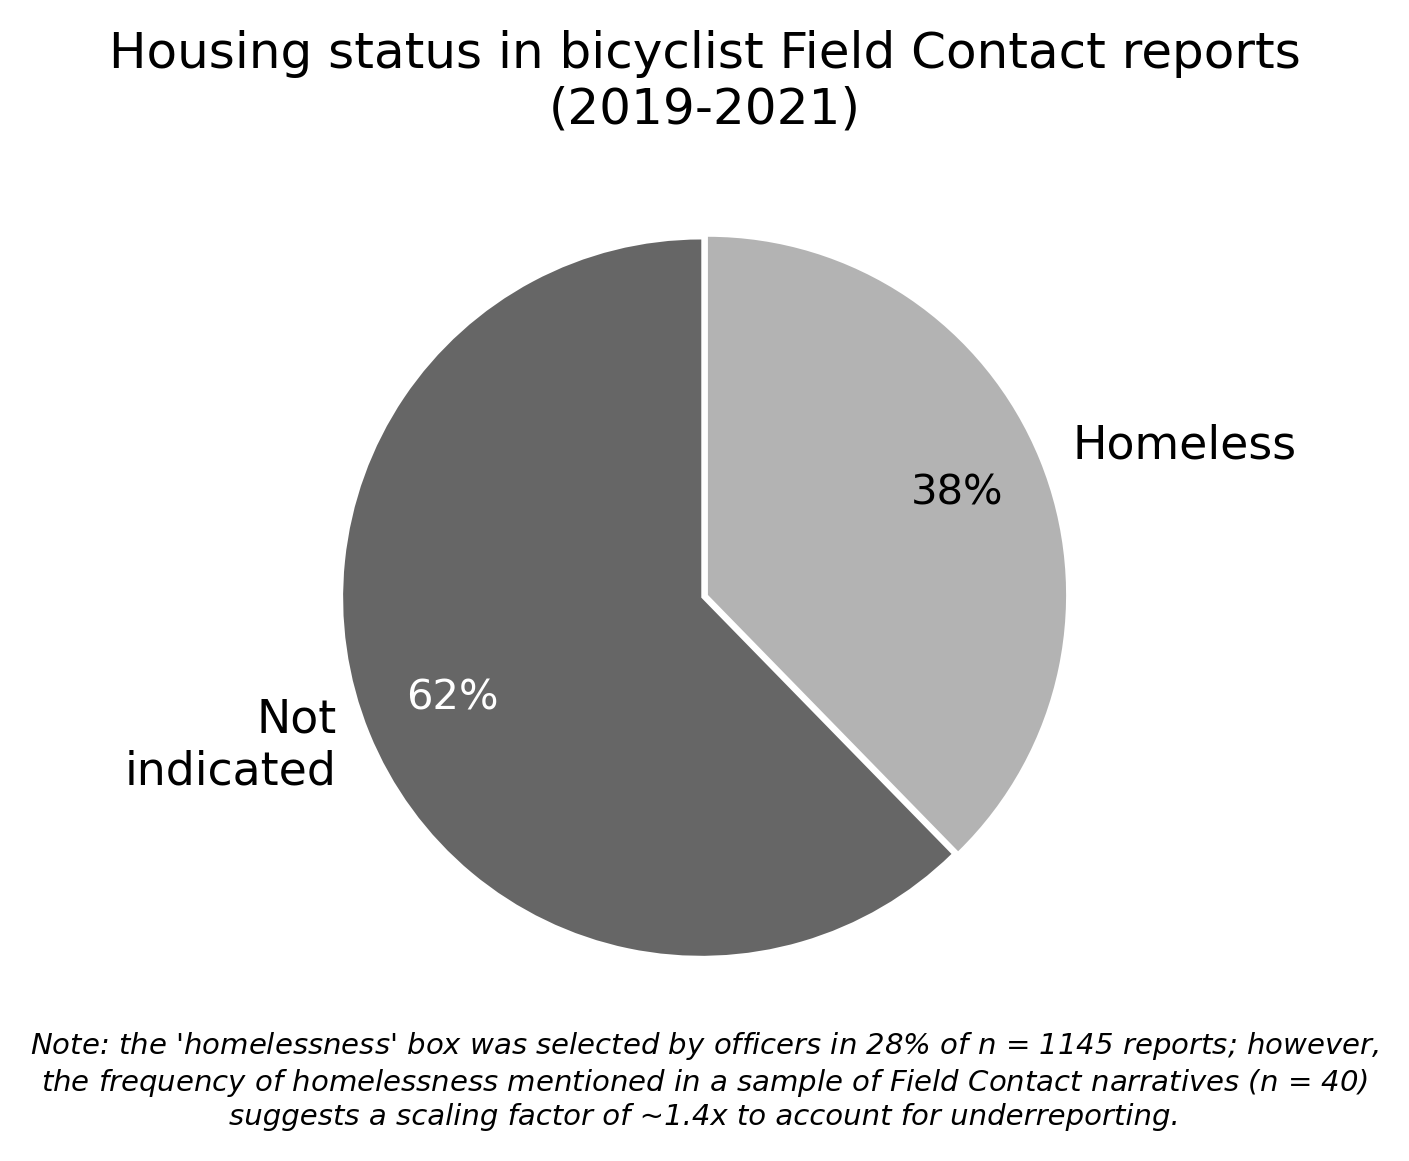

In [401]:
# housing status demographics from review of 40 narrative Field Contact reports

fc_report_housing = 100 * spd_fc_summaries['Homelessness'].value_counts(normalize=True,dropna=False)
presume_homeless_ratio = (fc_report_housing['Yes'] + fc_report_housing['Yes (presumed)']) / fc_report_housing['Yes']
fc_data_homeless_recorded = 100 * sum(spd_fc_combined['Event Statistics'].str.contains('Homelessness')) / len(spd_fc_combined)
fc_data_homeless_inferred = fc_data_homeless_recorded * presume_homeless_ratio

def autopct(percent): return ('%.0f%%' % percent)

plt.figure(figsize=(6,4),facecolor='w')
wedges, labels, autopct = plt.pie([(100-fc_data_homeless_inferred),fc_data_homeless_inferred],
                                  explode=tile(0.01,2),startangle=90,
                                  labels=['Not\nindicated','Homeless'],
                                  colors=['0.4','0.7'],
                                  labeldistance=1.10,autopct=autopct,pctdistance=0.75)
autopct[0].set_color('w')
for lab in labels: lab.set_fontsize(11)
for pct in autopct: pct.set_fontsize(10)
plt.title('Housing status in bicyclist Field Contact reports\n(2019-2021)');
plt.text(0.5,0.05,"Note: the 'homelessness' box was selected by officers in {0:.0f}% of $n$ = {1} reports; however,\nthe frequency of homelessness mentioned in a sample of Field Contact narratives ($n$ = {2})\nsuggests a scaling factor of ~{3:.1f}x to account for underreporting.".format(fc_data_homeless_recorded,len(spd_fc_combined),len(spd_fc_summaries),presume_homeless_ratio),
         fontsize=7,fontstyle='italic',horizontalalignment='center',transform=plt.gcf().transFigure);
plt.tight_layout()
plt.savefig(current_results_dir + 'spd_field_contact_homelessness.pdf')

In [336]:
spd_citations['Law Description'].value_counts(normalize=True)

Bicycle Helmet Required                                   0.550082
Bicycle Rider Rights/Duties Violation                     0.305057
Bicycle No/Improper Lamps/Reflectors                      0.069494
Bicycle Yield Right of Way in Crosswalk                   0.022838
Bicycle Riding on Roadways Rules Violation                0.019250
Bicycle Unsafe Pass on Right                              0.008809
Bicycle Riding on Sidewalk/Public Path Rules Violation    0.006852
Bicycle No/Improper Hand Signals                          0.006525
Bicycle No/Improper Brakes                                0.003915
Bicycle Control One Hand Minimum Required                 0.002610
Bicycle Clinging to Vehicle                               0.001305
Bicycle Failure to Ride on Seat                           0.000979
Bicycle Excess Passengers                                 0.000979
Bicycle Parent of Child Responsibility                    0.000653
Bicycle Riding More Than 2 Abreast                        0.00